In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random
from scipy.stats import wasserstein_distance
from matplotlib.backends.backend_pdf import PdfPages
import json

### I. Load the data

In [3]:
PIPELINE_SWITCH = 0

In [4]:
def easier_indexing(Gs):
    """
        Quick tool for easier indexing 
    """
    keys = [Gs[i][1][:-5] for i in range(len(Gs))]
    topic_dict = dict(zip(keys, list(range(len(keys)))))
    return topic_dict

#GL = pickle.load(open("data/graphlistnew.pickle", "rb" ))
#topic_dict = easier_indexing(GL)

GL = pickle.load(open("data/garimellanets.pickle", "rb" ))

In [5]:
if not PIPELINE_SWITCH:
    
    polarized = "netanyahu"
    unpolarized = "germanwings"
    #polarized_network = nx.gnp_random_graph(n=1000, p=0.1)

    #polarized_network = GL[topic_dict[polarized]][0][0][0]
    #unpolarized_network = GL[topic_dict[unpolarized]][0][0][0]
    
    polarized_network = GL[polarized]
    unpolarized_network = GL[unpolarized]

## CORE POLARIZATION

In [6]:
def find_main_core(G, k=None):
    
    core_subgraph = nx.k_core(G, k=None, core_number=None)
    
    return core_subgraph

In [7]:
def get_colormap(G, core_subgraph, colors):
    
    color_map = []
    for node in G:
        if node in core_subgraph.nodes():
            color_map.append(color[0])
        else: 
            color_map.append(color[1]) 
    
    return color_map

In [8]:
def find_n_cores(network, n):
    
    colorlist = ["red", "blue", "orange", "green", "yellow", "brown"]
    cores = dict()
    
    G = network.copy()
    
    for i in range(n):
    
        cores[i] = find_main_core(G)
        
        for node in cores[i].nodes:
            G.remove_node(node)
            
        #Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        #G0 = G.subgraph(Gcc[0])
           
    return cores

In [9]:
def color_cores(cores, network):
    
    color_map = []

    for node in network:
        if node in cores[0]:
            color_map.append("red")
        elif node in cores[1]:
            color_map.append("blue")
        else: 
            color_map.append("gray") 
    
    return color_map

Name: 
Type: Graph
Number of nodes: 9434
Number of edges: 14476
Average degree:   3.0689
0.0003253365551151386


Name: 
Type: Graph
Number of nodes: 29763
Number of edges: 39075
Average degree:   2.6257
8.822469500181059e-05
CORE I 

Clustering coefficient:  0.2007615574809644
Transitivity:  0.19636147913782875
Number of nodes:  51
Density:  0.2635294117647059


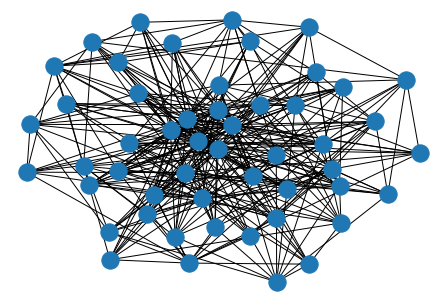



CORE II 

Clustering coefficient:  0.158860926930459
Transitivity:  0.10575139146567718
Number of nodes:  83
Density:  0.07464002350866882


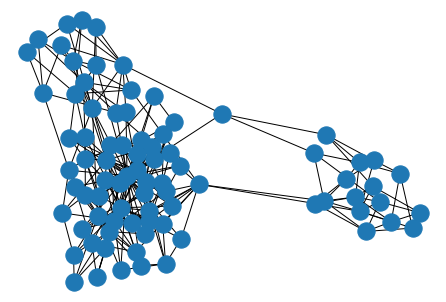

CORE I 

Clustering coefficient:  0.055599591393232756
Transitivity:  0.05294522117808847
Number of nodes:  78
Density:  0.13186813186813187


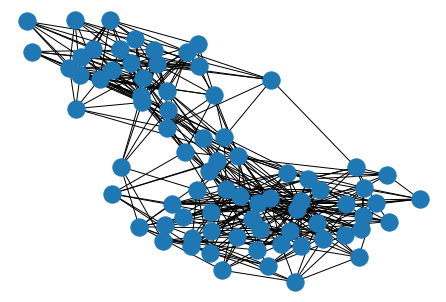



CORE II 

Clustering coefficient:  0.0
Transitivity:  0
Number of nodes:  29
Density:  0.27586206896551724


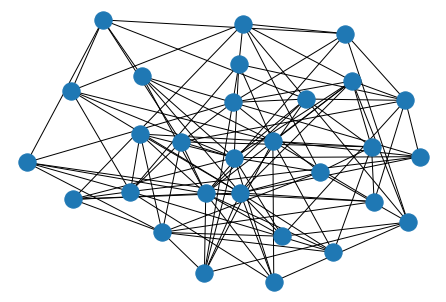

In [10]:
if not PIPELINE_SWITCH:
    
    # Here self-retweets do not make sense
    polarized_network.remove_edges_from(nx.selfloop_edges(polarized_network))
    unpolarized_network.remove_edges_from(nx.selfloop_edges(unpolarized_network))

    # First we expect to have two weakly connected cores in polarized network, we can look for more cores if needed
    polarized_cores = find_n_cores(polarized_network, 2)
    unpolarized_cores = find_n_cores(unpolarized_network, 2)
    
    # Quick facts on the overall networks
    print(nx.info(polarized_network))
    print(nx.density(polarized_network))
    print("\n")
    print(nx.info(unpolarized_network))
    print(nx.density(unpolarized_network))
    
    # Deeper look into cores

    # For polarized

    print("CORE I \n")
    nx.draw(polarized_cores[0])
    print("Clustering coefficient: ", nx.average_clustering(polarized_cores[0]))
    print("Transitivity: ", nx.transitivity(polarized_cores[0]))
    print("Number of nodes: ", len(polarized_cores[0]))
    print("Density: ",nx.density(polarized_cores[0]))
    plt.show()
    print("\n")
    print("CORE II \n")
    nx.draw(polarized_cores[1])
    print("Clustering coefficient: ", nx.average_clustering(polarized_cores[1]))
    print("Transitivity: ", nx.transitivity(polarized_cores[1]))
    print("Number of nodes: ", len(polarized_cores[1]))
    print("Density: ",nx.density(polarized_cores[1]))
    plt.show()
    # For unpolarized

    print("CORE I \n")
    nx.draw(unpolarized_cores[0])
    print("Clustering coefficient: ", nx.average_clustering(unpolarized_cores[0]))
    print("Transitivity: ", nx.transitivity(unpolarized_cores[0]))
    print("Number of nodes: ", len(unpolarized_cores[0]))
    print("Density: ",nx.density(unpolarized_cores[0]))
    plt.show()
    print("\n")
    print("CORE II \n")
    nx.draw(unpolarized_cores[1])
    print("Clustering coefficient: ", nx.average_clustering(unpolarized_cores[1]))
    print("Transitivity: ", nx.transitivity(unpolarized_cores[1]))
    print("Number of nodes: ", len(unpolarized_cores[1]))
    print("Density: ",nx.density(unpolarized_cores[1]))
    
    polarized_cm = color_cores(polarized_cores, polarized_network)
    unpolarized_cm = color_cores(unpolarized_cores, unpolarized_network)

#### Visualize the cores inside the whole network

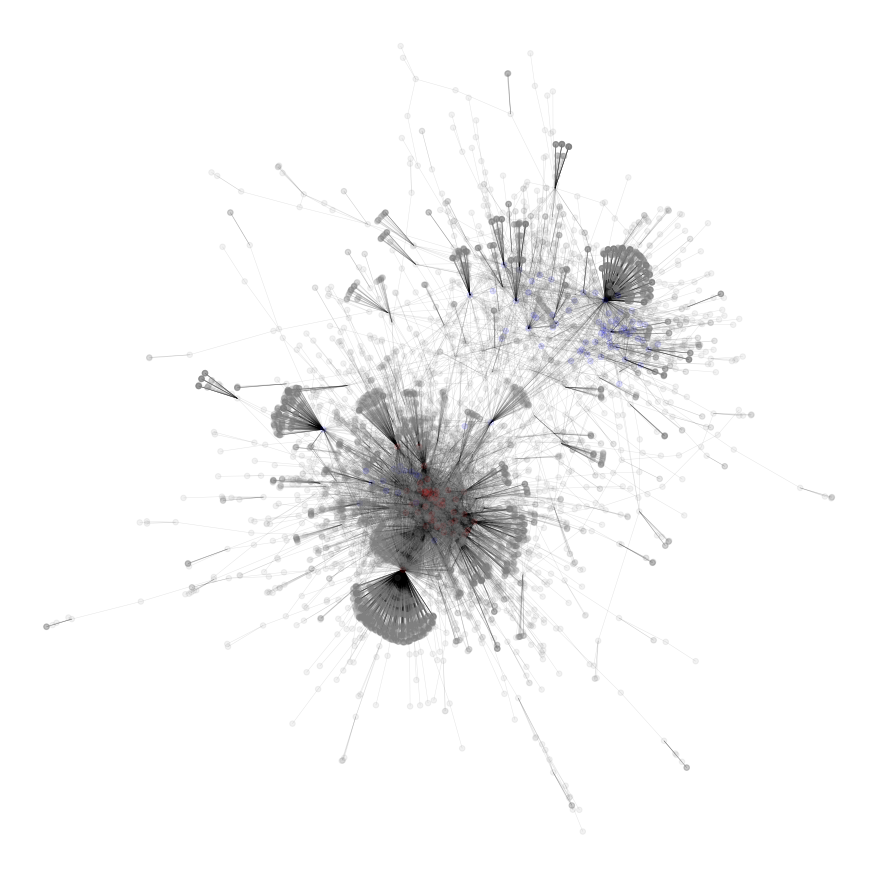

In [11]:
plt.figure(1,figsize=(12,12)) 
nx.draw_spring(polarized_network, node_size=30, width=0.5, alpha=0.1, node_color=polarized_cm)

In [12]:
plt.figure(2,figsize=(12,12)) 
nx.draw_spring(unpolarized_network, node_size=30, width=0.5, alpha=0.1, node_color=unpolarized_cm)

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

#### Visualize only the cores inside the whole network

In [ ]:
polarized_backbone_nodes = (nx.compose_all(polarized_cores.values())).nodes
unpolarized_backbone_nodes = (nx.compose_all(unpolarized_cores.values())).nodes

polarized_backbone = polarized_network.subgraph(polarized_backbone_nodes)
unpolarized_backbone = unpolarized_network.subgraph(unpolarized_backbone_nodes)

In [ ]:
polarized_backbone_cm = color_cores(polarized_cores, polarized_backbone)
unpolarized_backbone_cm = color_cores(unpolarized_cores, unpolarized_backbone)

In [ ]:
plt.figure(1,figsize=(12,12)) 
nx.draw_spring(polarized_backbone, node_size=30, width=0.5, alpha=0.1, node_color = polarized_backbone_cm)

In [ ]:
plt.figure(1,figsize=(12,12)) 
nx.draw_spring(unpolarized_backbone, node_size=30, width=0.5, alpha=0.1, node_color = unpolarized_backbone_cm)

In [ ]:
print("POL-BACKBONE/NETWORK RATIO: ", len(polarized_backbone)/len(polarized_network))
print("unPOL-BACKBONE/NETWORK RATIO: ", len(unpolarized_backbone)/len(unpolarized_network))

In [69]:
polarized_ac = nx.algebraic_connectivity(polarized_backbone)
unpolarized_ac = nx.algebraic_connectivity(unpolarized_backbone)

polarized_nac = nx.algebraic_connectivity(polarized_backbone, normalized=True, tol=1e-02)
unpolarized_nac = nx.algebraic_connectivity(unpolarized_backbone, normalized=True)

## MEASURING THE CORE POLARIZATION 

1. Random Walk based score

In [11]:
def perform_randomwalk(G, starting_node, li, ri):
    
    found = 0
    end_side = 0
    which_random_starting_node = starting_node
   
    while (found != 1):
        neighbors = list(G.neighbors(which_random_starting_node))
        next_node = random.choice(neighbors)
        if (next_node in li):
            end_side = "A"
            found = 1  
        elif (next_node in ri):
            end_side = "B"
            found = 1
        else:
            which_random_starting_node = next_node       
    return end_side

def random_walk(backbone, cores, n_iter):
    
    centrality_core1 = nx.closeness_centrality(cores[0])
    centrality_core2 = nx.closeness_centrality(cores[1])
    
    A = max(centrality_core1, key=centrality_core1.get)
    B = max(centrality_core2, key=centrality_core2.get)
    
    AA = 0
    AB = 0
    BB = 0
    BA = 0
    
    starting_nodes = random.choices(list(cores[0]) + list(cores[1]), k=n_iter)
    
    for node in starting_nodes:
        
        res = perform_randomwalk(backbone, node, [A], [B])
        
        if node in cores[0] and res == "A":
            AA += 1
        
        elif node in cores[0] and res == "B":
            AB += 1
            
        elif node in cores[1] and res == "B":
            BB += 1
            
        elif node in cores[1] and res == "A":
            BA += 1
            
        else:
            print("Not possible!")
            
            
    pAA = AA/(AA+AB)
    pAB = 1-pAA
    
    pBB = BB/(BB+BA)
    pBA = 1-pBB
        
    
    return(pAA*pBB - pAB*pBA)

2. Information Unfairness inspired measure

In [12]:
def accessibility_score(backbone, cores, p=0.5):
    
    nodelist = list(cores[0]) + list(cores[1])
    M = nx.to_numpy_matrix(backbone, nodelist=nodelist)
    
    A = p*M + p**2 * M**2 + p**3*M**3
    n_core1 = len(cores[0])
    
    core1_intra = A[:n_core1, :n_core1].flatten().tolist()[0]
    core2_intra = A[n_core1:, n_core1:].flatten().tolist()[0]
    core_inter = A[:n_core1, n_core1:].flatten().tolist()[0]
    
    EMD = wasserstein_distance(core1_intra + core2_intra, core_inter)
    
    return(np.var(A), EMD)

A measures the expected
number of times that node v will hear about a cascade
originating at node u, using walks of length up to k

3. Echo Chamber effect

4. Assortativity 

In [13]:
def assortativity(backbone):
    r=nx.degree_assortativity_coefficient(backbone)
    return r

5. Spectral approach (Algebraic connectivity)

In [14]:
def algebraic_connectivity(backbone):
    
    ac = nx.algebraic_connectivity(backbone)
    normalized_ac = nx.algebraic_connectivity(backbone, normalized=True)
    
    return (ac, normalized_ac)

### ANALYTICAL PIPELINE

In [15]:
vague=["jotainrajaa", "piraatit", "samasuunta"]

In [23]:
def compute_core_polarization(net, vis=False):
    
    G = net.copy()
    
    # Remove self-retweets
    G.remove_edges_from(nx.selfloop_edges(G))
    
    # Find two cores
    cores = find_n_cores(G, 2)
    
    # Take core subgraph
    backbone_nodes = (nx.compose_all(cores.values())).nodes
    backbone = G.subgraph(backbone_nodes)
    
    # Compute both AC and NAC
    #AC = nx.algebraic_connectivity(backbone)
    #NAC = nx.algebraic_connectivity(backbone, normalized=True)
    
    #M = nx.to_numpy_matrix(net)
    #A = 0.5*M + 0.5**2 * M**2 + 0.5**3*M**3
    
    # Save values
    score_dict = dict()
    
    score_dict["RW"] = random_walk(backbone, cores, 1000)
    #print("RW completed.")
    if t not in vague:
        score_dict["AC"] = algebraic_connectivity(backbone)
        #print("AC completed.")
    else:
        score_dict["AC"] = (0,0)
    score_dict["FLOW"] = accessibility_score(backbone, cores)
    #print("FLOW completed.")
    score_dict["ASSOR"] = assortativity(backbone)
    #print("ASSOR completed.")
    
    if vis:
        # Visualize only the cores
        backbone_cm = color_cores(cores, backbone)
        plt.figure(figsize=(10,10)) 
        nx.draw_spring(backbone, node_size=30, width=0.5, alpha=0.1, node_color = backbone_cm)
        plt.text(0.5, 0.5,"AC: " + str(AC) + "\nNAC: " +str(NAC),
         horizontalalignment='center',
         verticalalignment='center')

    #return (AC, NAC)
    return score_dict
    

In [24]:
all_topics = list(topic_dict.keys())

polarized_topics = ["jotainrajaa", "vihreät", "perussuomalaiset", "vasemmisto", "vihapuhe", "ilmastonmuutos"]
unpolarized_topics = ["mielenterveys", "liikenne", "kunnat", "tekoäly"]

core_polarization = dict()

In [ ]:
for t in all_topics:
    
    if t == "vaalikone":
        continue
    #Load the network
    network = GL[topic_dict[t]][0][0][0]
    
    #Compute all scores for core polarization
    core_polarization[t] = compute_core_polarization(network)
    
    print("Following topic completed: ", t)

In [ ]:
# Save to file
import json
with open('results.json', 'w') as fp:
    json.dump(core_polarization, fp)

### VISUALIZATION PIPELINE

In [1]:
topics = list(core_polarization.keys())

polarized_topics = ["kokoomus", "vihreät", "perussuomalaiset", "vasemmisto", "vihapuhe", "ilmastonmuutos", "maahanmuutto"]
unpolarized_topics = ["mielenterveys", "liikenne", "kunnat", "tekoäly", "nuoret", "urheilu", "yrittäjät", "rekry"]

NameError: name 'core_polarization' is not defined

In [ ]:
topics

In [ ]:
with PdfPages('unpolarized_pdf.pdf') as pdf:
    
    for t in unpolarized_topics:

        plt.figure(figsize=(12,12)) 
        plt.title(t + ", RW: " + str(round(core_polarization[t]["RW"],3)) + ", ACC: " + str(round(core_polarization[t]["AC"][1],3)) + ", FLOW: " + str(round(core_polarization[t]["FLOW"][1],3)))
        
        #Load the network
        network = GL[topic_dict[t]][0][0][0]
        G = network.copy()
    
        # Remove self-retweets
        G.remove_edges_from(nx.selfloop_edges(G))
    
        # Find two cores
        cores = find_n_cores(G, 2)
    
        # Take core subgraph
        cm = color_cores(cores, G)
        
        nx.draw_spring(G, node_size=30, width=0.5, alpha=0.1, node_color=cm)
        pdf.savefig()
        #plt.close()

        print("Topic visualized: ", t)

### RESULTS

1. Identify the cores, evaluate their quality if necessary.

2. Measure the core polarization score.

In [ ]:
core_polarization

In [2]:
all_topics = list(core_polarization.keys())

polarized_topics = ["kokoomus", 
                    "vihreät", 
                    "perussuomalaiset", 
                    "vasemmisto", 
                    "vihapuhe", 
                    "ilmastonmuutos", 
                    "maahanmuutto",
                    "sote",
                    "ilmastovaalit"]

unpolarized_topics = ["mielenterveys", 
                      "liikenne", 
                      "kunnat", 
                      "tekoäly", 
                      "nuoret", 
                      "urheilu", 
                      "yrittäjät",
                      "yrittäjyys",
                      "rekry",
                      "osaaminen",
                      "johtaminen"]

NameError: name 'core_polarization' is not defined

In [94]:
polarized_flow = []
unpolarized_flow = []

polarized_ac = []
unpolarized_ac = []

polarized_rw = []
unpolarized_rw = []

for t in polarized_topics:
    polarized_flow += [core_polarization[t]["FLOW"][1]]
    polarized_ac += [core_polarization[t]["AC"][1]]
    polarized_rw += [core_polarization[t]["RW"]]
    
for t in unpolarized_topics:
    unpolarized_flow += [core_polarization[t]["FLOW"][1]]
    unpolarized_ac += [core_polarization[t]["AC"][1]]
    unpolarized_rw += [core_polarization[t]["RW"]]

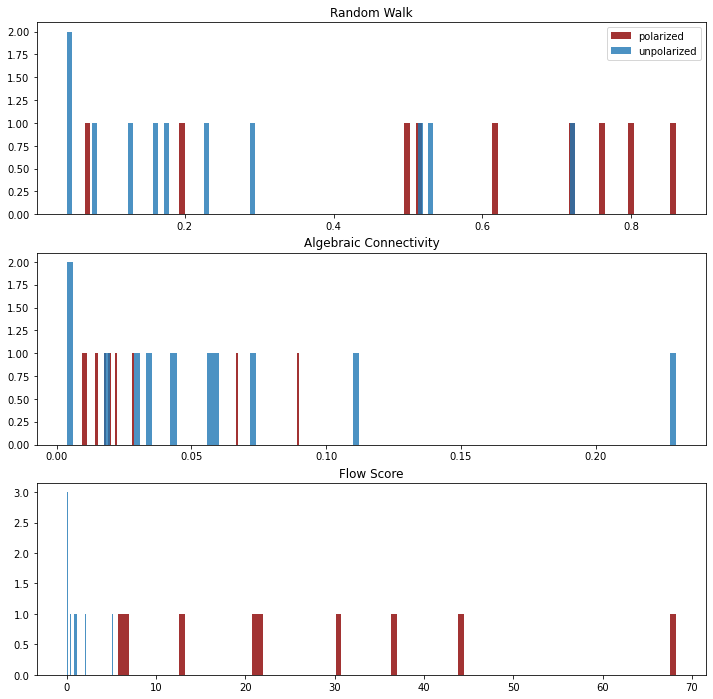

In [95]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.title("Random Walk")
plt.hist(polarized_rw, label="polarized", color="darkred", alpha=0.8, bins=100)
plt.hist(unpolarized_rw, label="unpolarized", alpha=0.8, bins=100)
plt.legend()

plt.subplot(3,1,2)
plt.title("Algebraic Connectivity")
plt.hist(polarized_ac, label="polarized", color="darkred", alpha=0.8, bins=100)
plt.hist(unpolarized_ac, label="unpolarized", alpha=0.8, bins=100)

plt.subplot(3,1,3)
plt.title("Flow Score")
plt.hist(polarized_flow, label="polarized", color="darkred", alpha=0.8, bins=100)
_ = plt.hist(unpolarized_flow, label="unpolarized", alpha=0.8, bins=100)

In [3]:
# Let us do this for all topics, probably faster way to implement this

all_flow, all_ac, all_rw = [], [], []

for t in all_topics:
    all_flow += [core_polarization[t]["FLOW"][1]]
    all_ac += [core_polarization[t]["AC"][1]]
    all_rw += [core_polarization[t]["RW"]]
    
    
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.title("Random Walk")
plt.hist(all_rw, color="darkred", alpha=0.8, bins=100)

plt.subplot(3,1,2)
plt.title("Algebraic Connectivity")
plt.hist(all_ac, color="darkred", alpha=0.8, bins=100)

plt.subplot(3,1,3)
plt.title("Flow Score")
_ = plt.hist(all_flow label="unpolarized", alpha=0.8, bins=100)

SyntaxError: invalid syntax (<ipython-input-3-236f5eee5a21>, line 23)